<h1 align="center">Advanced Linear Regression </h1>

# Program so far 
***
* Introduction to Python - You are now a budding pythonista

* Introduction to Machine Learning - You can tell a classification task from a clustering 

* Basic Probability & Descriptive Stats - You are at peace with Statistics

* Steps involved in solving an end-to-end ML problem - One Step Closer to Machine Learning

# Agenda for the Day
***
- Shortcomings of linear regression
- Polynomial Basis Function
- Regularization(L1/L2)
- Bias-variance trade-off

# Recall
***
The bivariate linear regression model can be expressed as $y = theta * x + b$. You can estimate the value of the regression parameters `b and theta` using the Ordinary Least Squares(OLS) method of optimization. 

## Cost Function:
***

- An ideal case would be when all the individual points in the scatter plot fall directly on the line OR a straight line passes through all the points in our plot, but in reality, **that rarely happens**
  
- We can see that for a Particular Area, there is a difference between Price given by our data point (which is the correct observation) and the line (predicted observation or **Fitted Value**)

- So how can we Mathematically capture such differences and represent it? 

### Cost Function
***
We choose  θs so that predicted values are as close to the actual values as possible

We can define a mathematical function to capture the difference between the predicted and actual values.

This function is known as the cost function and denoted by $J(θ)$

### Cost function:
***

$$\frac{1}{2m} \sum _{i=1}^m (h_\theta(X^{(i)})-Y^{(i)})^2$$

* $\theta$ is the coefficient of 'x' for our linear model intuitively. It measures how much of a unit change of 'x' will have an effect on 'y'
- Here, we need to figure out the values of intercept and coefficients so that  the cost function is minimized.
- We do this by a very important and widely used Algorithm: **Gradient Descent**

### Gradient Descent Intuition
***
 - So, we want to choose θ so as to minimize J(θ)
 - Gradient Descent is a search Algorithm that starts with some “initial guess” for θ, and that repeatedly changes θ to make J(θ) smaller, until hopefully we converge to a value of θ that minimizes J(θ)


 - It repeatedly performs an update on θ as shown:
<img src="../images/Image1.PNG">

### Gradient Descent Intuition
***
  - Here α is called the learning rate. This is a very natural algorithm that repeatedly takes a step in the direction of steepest decrease of J

### Gradient Descent Optimization 
***
<br />
Gradient in the previous  eq.(1) can be simplified as following

<img src="../images/Image2.PNG">

### Gradient Descent Optimization 
***
Hence, for a single training example, eq.(1) becomes

<img src="../images/Image3.PNG">

For the training set, eq.(1) becomes

<img src="../images/Image4.PNG">

Here,  xj is the corresponding predictor for  θj.

For example, predictor corresponding to  θ1  and 2nd training example,  x(2)1  is 24.

Value for all  x(i)0  is equal to 1.

## Gradient Descent Algorithm & Implementation in Python
***
To get the optimal value of  θ , perform following algorithm known as the **Batch Gradient Descent Algorithm**

<img src="../images/Image5.PNG">


### Getting Started:
***

We have seen how Gradient Descent helps us to minimize the cost function. In this exercise we will learn to write functions to implement our own batch gradient descent algorithm for univariate linear regression! 

<div class="alert alert-block alert-success">You may want to revise and refer to the Steps of the algorithm from the slides to get a strong intuition on what your functions should look like
</div>

<div class="alert alert-block alert-danger">You should not use any sklearn objects for the purpose of this exercise </div>

## Python Implementation of Gradient Descent Algorithm
***

Let's start with calculating the error of a given linear regression model.
We will consider univariate model so that
$$y = theta * x + b$$

Let's write a function `error_calculator()` so that given `b`, `theta` and X and y, we can calculate the error.

The fucntion would look something like this:

In [ ]:

import numpy as np

def error_calculator(b, theta, points):
    data = np.array(points)
    x = data[:,0]
    y = data[:,-1]
    y_predicted = theta * x + b
    error = np.sum((y - y_predicted)**2) / data.shape[0]
    return  error

Now that we have calculated the mean square error, we can calculate the gradient.

We can write a function, that, given current parameters, calculates the gradeint.

Such a function would look like this:

In [ ]:
def gradient(b_current, theta_current, points, learningRate):
    data = np.array(points)
    x = data[:, 0]
    y = data[:, 1]
    N = data.shape[0]
    b_gradient = -2 * np.sum(y - (theta_current * x + b_current)) / N
    theta_gradient = -2 * np.sum(x * (y - (theta_current * x + b_current))) / N
    new_b = b_current - (learningRate * b_gradient)
    new_theta = theta_current - (learningRate * theta_gradient)
    return new_b, new_theta

Now that we have calculated the gradient, we need to find num_iterations

We can write a function, that, given current parameters, calculates the num_iteration and returns the list of calculated errors.

Such a function would look like this:

In [ ]:
def gradient_descent(starting_b, starting_theta, points, learning_rate, num_iterations):
    b = starting_b
    theta = starting_theta
    b_list = []
    theta_list = []
    error_list = []
    for i in range(num_iterations):
        b, theta = gradient(b, theta, points, learning_rate)
        error = error_calculator(b, theta, points)
        b_list.append(b)
        theta_list.append(theta)
        error_list.append(error)
    return b_list, theta_list, error_list

In [ ]:
points = np.genfromtxt("../data/data.csv", delimiter=",")
learning_rate = 0.0001
initial_b = 2 # initial y-intercept guess
initial_m = 6 # initial slope guess
num_iterations = 15

In [ ]:
error_before = error_calculator(initial_b, initial_m, points)
b, theta, error = gradient_descent(initial_b, initial_m, points, learning_rate, num_iterations)
error_after = error_calculator(b[-1], theta[-1], points)

In [ ]:
print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, error_before))
print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b[-1], theta[-1], error_after))

Next we need to plot '$\theta$'. So we write a function, that, given current parameters, plots the value to theta against iteration number.

This function would look something like this.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(theta)
plt.xlabel("Iterations")
plt.ylabel("theta")
plt.title("Theta")
plt.show()

Next we need to plot 'b'. So we write a function, that, given current parameters, plots the value to 'b' against iteration number.

This function would look like this.

In [ ]:
plt.plot(b)
plt.xlabel("Iterations")
plt.ylabel("constant term")
plt.title("b");

Next we need to plot 'errors'. So we write a function, that, given current parameters, plots the value to 'errors' against iteration number.

This function would look like this.

In [ ]:
plt.plot(error)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Error");

## John's Story so far..

- We saw that John learnt to fit a model to the housing data he collected 
- He predicted the Price of the House given its Area 
- He started by fitting a **Linear Model** and made predictions 
- However, with further analyses, John realized that his predictions could be improved!

# So, why was John unhappy with Linear Regression?
***
* He thought what if there are houses that are having prices way away from the regression line? Are these outliers? 
 
* **What happens when the model is exposed to outliers ?** 
 
* **Does this model prove to be good enough in examining the relationship between a dependent variable and independent variable?**

Let's see what happens to our model when we expose it to outliers. 
## Outliers
* We learnt about **outliers** in Descriptive Statistics. Lets intuitively understand what they are, quickly
* What do you infer by looking at the image below?

* The data point far away from the 'model' is basically an *Outlier*

## John's Hesitancy

* John was still confused on how outliers could affect the parameters of a Linear Model
* So in order to understand about outliers, John genrated some random data points with his python skills and plotted it
* Let's check out what he did! 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(9)

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);
plt.xlabel("Random Values of x")
plt.ylabel("Random Values of Y")
plt.title("Random Plot")

## Fitting a line on the random data

* Now john is curious to fit a Linear regression model and check how it fits the data.

In [ ]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression(fit_intercept=True)

model1.fit(x[:, np.newaxis], y)

xfit1 = np.linspace(0, 10, 50)
yfit1 = model1.predict(xfit1[:, np.newaxis])
print ("model coeff: {0:.2f}".format(model1.coef_[0]))
print ("model intercept: {0:.2f}".format(model1.intercept_))

plt.scatter(x, y)
plt.plot(xfit1, yfit1);
plt.xlabel("Random Values of x")
plt.ylabel("Random Values of Y")
plt.title("Random Plot")

* The Linear regression model fits well to the data he generated randomly. He got the regression equation to be:

$$ y = -5.00 \beta_0 + 2.03 \beta_1 $$

* Now john wants to see what would happen if there is an outlier, so he implemented it in Python. Let's check it out


**Introducing Outliers:** 

In [ ]:
###Adding first outlier
rng = np.random.RandomState(1)
x3 = 10 * rng.rand(50)
y3 = 2 * x3 - 5 + rng.randn(50)
y3[20] = 50
plt.scatter(x3, y3)
plt.xlabel("Random Values of x")
plt.ylabel("Random Values of Y")
plt.title("Random Plot w/ Outlier")

## In-class activity: 
***

Now, let's use our skills to fit a model through our new data points and then plot the "best-fitting" line:


In [ ]:
## Your code here







## Adding a second Outlier 

- Now, John thought of adding a second outlier and see how the regression line changes. Can you help him out with the code? 

In [ ]:
#Adding second outlier

rng = np.random.RandomState(1)
x4 = 10 * rng.rand(50)
y4 = 2 * x4 - 5 + rng.randn(50)
y4[5] = 50
plt.scatter(x4, y4);

## In-class activity: 
***

Now, let's use our skills to fit a model through our data points with 2 outliers and then plot the "best-fitting" line:


In [ ]:
# Your Code here








Now let's see how our models look if put together.

In [ ]:
# Your Code here







**Plotting three lines** it can be seen that all the three lines vary from each other significantly.

`Verdict`: A single outlier can significantly change the model parameters.



## Lesson Learnt 

* After this exercise, John knows what outliers could do to linear regression model

* How are the linear model parameters changed by introducing outliers?

* As we already studied in the assumption of linear regression, linear models are sensitive to outliers. Now John needs to tackle the Outliers in order to fit a linear model


## What does John need to check apart from Outliers?
***
**Apart from outliers, John needs to check for the correlation between data points**

* But, John is confused with the term correlation. Remember: We studied this in Descriptive Stats and EDA but using it in this case, just for better predictions

* Linear correlation refers to straight-line relationships between two variables. But you might argue that the current dataset John's using, has 1 predictor so Correlation is not really something to worry about! There's always a *BUT*

* **Remember**: But, for Multivariate Linear Regresssion, John used 78 columns of the housing data that he put together! Now, since his final analysis contains all these predictor variables, he must check for this as well. 


## John's Experiment

* John considered a toy dataset with 2 variables which are **not** linearly related and checked how his model behaved and predicted.

* John generated the data in the below figure. Here, data is generated by adding noise to a *sin wave function*


In [ ]:
## Defining sinusodial relationship between x and y

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

plt.scatter(x, y);
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Non-Linear Function ")

* It is evident that a linear model will not be able to fit the data points properly. Still, John tries to fit a linear regression model to see what happens

* In general, simple linear model fails to explain non-linear data distributions

* We can see this below:


In [ ]:
# Fit your linear regression here

xfit1 = np.linspace(0, 10, 1000)
yfit1 = model1.predict(xfit1[:, np.newaxis])
print( "model coeff:", model1.coef_[0])
print ("model intercept:", model1.intercept_)

plt.scatter(x, y)
plt.plot(xfit1, yfit1);
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Sin Function")

As expected, the linear model does an extremely poor job of explaining the target variable. Hence, fitting a linear line to such a nonlinear data *oversimplifies* the model.

This is known as **underfitting**

 - Let's try and understand what underfitting is


## Underfitting
***
<br/>
Underfitting is when the the model *fails to capture the overall 'trend' of the data.*

A model that underfits is said to have **high bias.**

- It is the difference between predictions and truths using models trained by specific learning algorithm

- Error due to bias is because we assume that simple linear model will fit to non linear data distribution  while specifying the  algorithm

- Basically, we are biased toward the data having a linear trend and we hypothesize that our target variable increases linearly EVEN THOUGH WE CAN SEE A CLEAR NON-LINEAR TREND 



## What is the issue here?

John notices that the linear regression line is not able to fit 

- He thinks, what about a non-linear regression line? Polynomial regression line?




## How does John tackle this situtation?
***
<br />

* One way to tackle underfitting is through polynomial functions. Let's see the implementation of this technique.



## Polynomial Basis Function with sklearn
***
<br />

* In many settings, such a linear relationship may not hold. For example, if we are modeling the yield of a chemical synthesis in terms of the temperature at which the synthesis takes place, we may find that the yield improves by increasing amounts for each unit increase in temperature. In this case, we might propose a quadratic model of the form 

* In general, we can model the expected value of y as an nth degree polynomial, yielding the general polynomial regression model

 this is what is known as polynomial basis function  
 
* Polynomial projection is built into Scikit-Learn, using the ``Polynomial Features`` transformer:

## What is a Polynomial Feature Transformer? 

 - This is nothing but taking the *n-th* degree of your variable
 - Below is an easy example to display what it does
     - Say we wanted to take the 1st, 2nd and 3rd degree of the numbers 2,3 & 4. 
     - Intuitively we know that for 2 the 1st, 2nd and 3rd degrees are: 2, 4 $(2^2)$ and 8 $(2^3)$
 
 - Let's try and understand the code below: 

In [ ]:
#code to improvise polynomial regression model and increase the accuracy 

from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

Here the 3 in "PolynomialFeatures(3, include_bias=False)" is basically the value of degree of the polynomials up to which we want our data to be transformed to 

- We can see 3 values for 2,3 and 4. For example: $4^1$ (4), $4^2$ (16) and $4^3$ (64)

**Now, John decides to use the same technique to create a 7th-degree polynomial model for the non-linear data that he generated  earlier **

In [ ]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
xfit = np.linspace(0, 10, 1000)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Sin Function");

7th-order polynomial basis function can provide an excellent fit to this non-linear data.

There are many advantages of using Polynomial Regression as-
-  Broad range of functions can be fit over model
-  Polynomial fit a wide range of curvature 
-  It provides good approximation of the relationship and makes the transformation more interpretable.

## Side-tracking

** John becomes greedy as he finds the previous model out-performed the linear model so now he added a 18th degree polynomial feature **

In [ ]:
# added a 18th degree polynomial feature

higher_polynomial = make_pipeline(PolynomialFeatures(18),
                            LinearRegression())
higher_polynomial.fit(x[:, np.newaxis], y)
yfit = higher_polynomial.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Sin Function");

## Important Concept

**In the plot below, we can see how the model fits almost all the data points exactly if we introduce further higher degree polynomials **

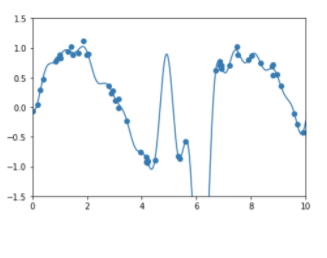

## What's going on?

Here, it seems like the model is learning `too much` from the data

*Not only is it learning legit data but also learning the noise.*

Such a model is said to be **overfitting**.

 - Let's try and understand what Overfitting is and how this applies to our example? 
 


## **Intutive Definition of Overfitting**
***
Overfitting occurs when your model follows the training dataset very rigorously i.e low training error, but it may not work well on generalized or test dataset i.e. high generalization error. 

For example- It's like a person cramming word to word from a book while studying for his exams. If the questions in the test are straight as is within the book, he will do well, else if the questions are more based on usage of multiple concepts outlined in the book he studied, the person may struggle.

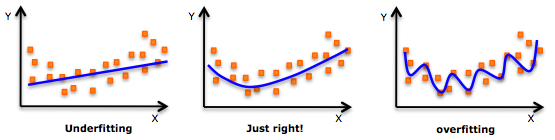
An overfitting model is said to have high variance.

We will discuss about bias and variance soon.


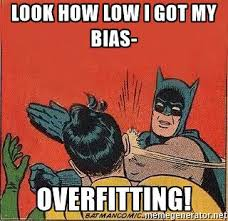

# How would John improve the predictive power of his linear regression and tackle overfitting?
***
## Concept of Regularization
***
 John doesn't know what to do. So, he asks his friend Jay about this!
 
 
* Jay narrates his own story
* As a parent Jay said that he is very cautious about the future of his children 
* He wants them to be successful in life without being strict with them. He took a decision about how much flexibility should be given to his children during their upbringing. 
* *Too much restriction may suppress their development of character*



** Alternatively ** 
- Too much flexibility may spoil them. 
***
- Jay decided to overcome this situation with the idea of regularized(regularization) flexibility, which is to give enough flexibility added with regularization. 
- By fulfilling some of the expectations of his kids, (continued)


**like ** 
- comic books, drawing setups, 
- storytelling, chocolate, 
- ice cream, 
- mobile game etc. to make them happy. 

** But ** 
added some regularization like:

- You have to finish your homework as well
- "Distribute chocolate equally with your sister"
- Checks exam tests, curfew, etc. 

** This is an example of a real life situation, just to build some intuition! Let's see what happens mathematically**

## Even though John doesn't like mathematics, Jay explained it very well
***
This overfitting behavior when basis functions overlap:
- The coefficients of adjacent basis functions grow large and cancel each other out.
- We need to limit such spikes explicitly in the model by penalizing large values of the model parameters (the thetas of variables)
- Such a penalty is known as regularization with two most used types of regularization

It can be done in three ways -
-  L1 Regularization (also called as Lasso Penalization/Regression)
-  L2 Regularization (also called as Ridge Penalization/Regression)
-  Elastic-net

# L1 Regularization (also called as Lasso penalisation)
***
<br />

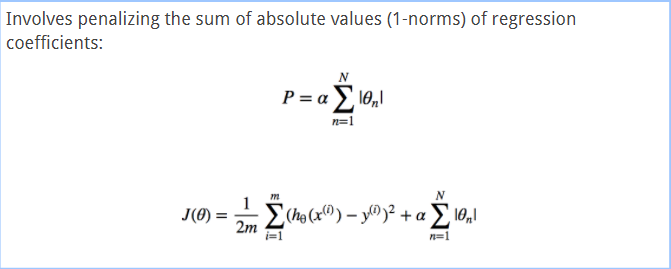

## Understanding L1

 - Here we are familiar with the First half of the Cost Function. We studied this yesterday
 
 - By adding all thetas to the cost function, which we want to minimize, we're adding further restrictions on these parameters
 
 - Notice how Theta_0 is not there as we're not penalizing our Intercept

** Jay gave an example to John for better understanding of it: **

- Suppose the model has 100 coefficients but only 10 of them have non-zero coefficients, this is effectively saying that “ the other 90 predictors are useless in predicting the target values ”.
- Though this is conceptually very similar to ridge regression(we will see in later slides), the results can differ surprisingly. For example, due to geometric reasons lasso regression tends to favor sparse models

- A sparse matrix is a matrix with a **LOT OF 0's**

- That is, it preferentially sets model coefficients to exactly zero!

## More on Lasso

- With the lasso regression penalty, the majority of the coefficients are exactly zero
- The  α  parameter tunes the strength of the penalty, and should be determined via cross-validation. (What is cross-validation? Later in this lecture)

- Let's use Lasso on our model and see how it performs 

In [ ]:
from sklearn.linear_model import Lasso
model = make_pipeline(PolynomialFeatures(15), Lasso(alpha=0.01))
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Fitting Lasso model");

 - Now let's have a look at the model coefficients
 - Also let's plot the coefficients and see their trend as our variables increase

In [ ]:
coef = model.steps[1][1].coef_
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(range(len(coef)), coef);
plt.plot(range(len(coef)), [0]*len(coef));
plt.xticks(range(16),('x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15'))
plt.title("LASSO Penalization")


plt.subplot(122)
coef = model.steps[1][1].coef_
plt.plot(range(len(coef)), coef);
plt.plot(range(len(coef)), [0]*len(coef));
plt.ylim(-5e-7, 5e-7)
plt.xticks(range(16),('x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15'))
plt.title("Closer Outlook")

print(coef)

* In the 1st graph we can observe that L1 regularization penalizes some of the co-efficients resulting them to zero. 
* It is appearing that after $X^4$ the coeff are reduced to zero.
***
* The second graph is a closer look and zooms in further to the scale of ($-5e^{-7}$, $5e^{-7}$).
* On zooming the 1st graph we found out that coefficient $X^8$ and later are penalized and reduced to zero.

# L2 Regularization (also called as Ridge penalisation) 
***
<br />

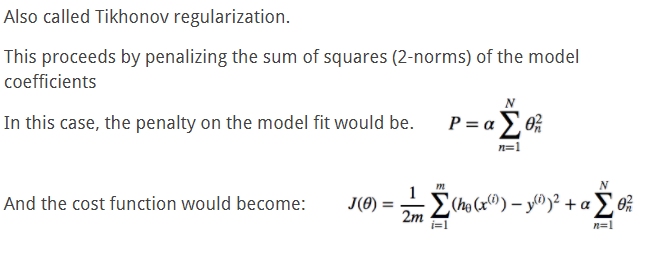



## L2 Regularization

- The L2 regularization will force the parameters to be relatively small, the bigger the penalization, the smaller (and the more robust to overfitting) the coefficients are
- Here we are considering every feature but we are penalizing the coefficients based on how significant the feature is

Here,  α is a hyper-parameter that controls the strength of the penalty.
The  α parameter controls complexity of the resulting model.
- In the limit  α→0 , we recover the standard linear regression result.
- In the limit  α→∞ , all model responses will be suppressed.

Ridge regression can be computed very efficiently at hardly more computational cost than the original linear regression model.
This type of penalized model is built into Scikit-Learn with the Ridge estimator.

- Let's see how to implement this and get our coefficients 

In [ ]:
#code to implement l2 and to from sklearn.linear_model import Ridge
from sklearn.linear_model import Ridge
model = make_pipeline(PolynomialFeatures(16), Ridge(alpha=0.1))
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Fitting Ridge model")

Now, let's get our co-efficients, just like how we did for Lasso

- Also, let's plot it to see the trend of our coefficients. Again, this is similar to what we did

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(121)
coef = model.steps[1][1].coef_
plt.plot(range(len(coef)), coef);
plt.plot(range(len(coef)), [0]*len(coef))
plt.xticks(range(16),('x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15'))
plt.title("RIDGE Penalization")


plt.subplot(122)
coef = model.steps[1][1].coef_
plt.plot(range(len(coef)), coef);
plt.plot(range(len(coef)), [0]*len(coef));
plt.ylim(-5e-7, 5e-7)
plt.xticks(range(16),('x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15'))
plt.title("Closer outlook")

print(coef)

* On the contrary , L2 regularization does not reduces the coefficients to zero rather.

* On zooming the 1st graph we found out that coefficient $X^{14}$ and later are appearing to be reduced to zero but out of 16 polynomial features L2 regularization is successful in producing non zero coefficients.

- **NOTE** - Remember John had originally taken 18 features!

## L1 vs L2 Regularization (1/2)
***
<br />
* **Built-in feature selection**

* As we increased the value of alpha, coefficients were approaching towards zero rather quickly, 

**but ** 
* if you see in case of lasso, even at smaller alpha's, our coefficients are reducing to absolute zeros. 

## L1 vs L2 Regularization
***
<br />
** Therefore **, 
* Lasso Regression technique selects only some feature while it reduces the coefficients of others to zero. This property is known as feature selection and which is absent in case of ridge.

- A result of this, we tend to get a lot of 0s! 
- This doesn't necessarily happen in case of L2 - Ridge Regression

## Summary
***
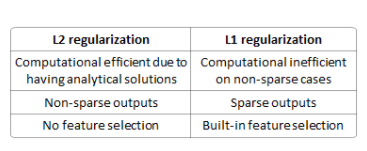

## John's Curiosity

John wants to know which technique would perform well if we have more feature(let's say 10000)?
 
* lets say we have a large dataset which has 10,000 features. 
* And some of the independent features are correlated with other independent features. 

**What do you recommend, Rigde or Lasso?**


## Jay's Thoughts 

* If we apply ridge regression to it, it will retain all of the features 

**but**
* it will shrink the coefficients. Still the problem is that model will remain complex as there are 10,000 features, thus may lead to poor model performance.

* if we apply lasso regression to this problem. 
* The main problem with lasso regression is when we have correlated variables, it retains only one variable and sets other correlated variables to zero. 
* That will possibly lead to some loss of information resulting in lower accuracy in our model.

** Then what is the solution for this problem? ** 

* For this we have another type of regression, known as 

** Elastic net regression,**

* which is basically a hybrid of ridge and lasso regression. So let's try to understand it

## Elastic-net
***
<br />

Elastic Net regularization is the combination of both L1 and L2 regulrization.

$$P = \alpha \displaystyle\sum^{N}_{n=1}{|\theta_n|} + (1 -\alpha) \displaystyle\sum^{N}_{n=1}{\theta_n^2}$$

* Elastic Net generally seems to perform better than both the individual L1 and L2 regularizations. 
* However, it is computationally more expensive

## How does Elastic Regression work?

John really doesn't understand how this works. He seeks out Jay for his input and this is what Jay had to say

* So Let's say, we have a bunch of correlated independent variables in a dataset, 
* Then elastic net will simply form a group consisting of these correlated variables. 
* Now if any one of the variable of this group is a strong predictor (meaning having a strong relationship with dependent variable), then we will include the entire group in the model building, 
* Because omitting other variables (like what we did in lasso) might result in losing some information in terms of interpretation ability, leading to a poor model performance.So it results out as bias and variance balance trade off with manipulating the  $\alpha$  which improves the model performance and reduces complexity.

 - Let's check how Elastic Net does. 
 - As done earlier, we'll check the coefficients and a plot to see the trend in the coefficients 

In [ ]:
#code to implement ElasticNet
from sklearn.linear_model import ElasticNet
model = make_pipeline(PolynomialFeatures(16), ElasticNet(alpha=1e-7))
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Fitting Elastic net model");

In [ ]:
#graph to show improvisation of elastic net 
coef = model.steps[1][1].coef_
plt.plot(range(len(coef)), coef);
plt.plot(range(len(coef)), [0]*len(coef))
plt.xticks(range(16),('x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15'))
plt.xlabel("Coefficients of $x_i$")
plt.ylabel("Y")
plt.title('Elastic net Penalisation')

print(coef)

## Bias - Variance -Trade off
***
<br />
* Now John as understood regularization and also implemented the models and checked how the model fits the data.

* But he is still confused, how to decide whether the model is overfitting or underfitting.

* So his friend introduced one more concept or method to understand it, which is known as Bias - Variance -Trade off.



## Bias-Variance Trade-off 

* So whenever we fit a model to a data, we can notice two properties; bias, giving us a some kind of measure on the model’s predictions’ average closeness to training data and variance, deviation of the predictions by John's model from the original data.

*  If we fit a model with a low complexity, it will not follow the real trend in the data and John's model introduces high bias.

* This high bias in our model will not be able to follow the real trend in data and will produce predictions that are closer to our other predictions hence low variance.

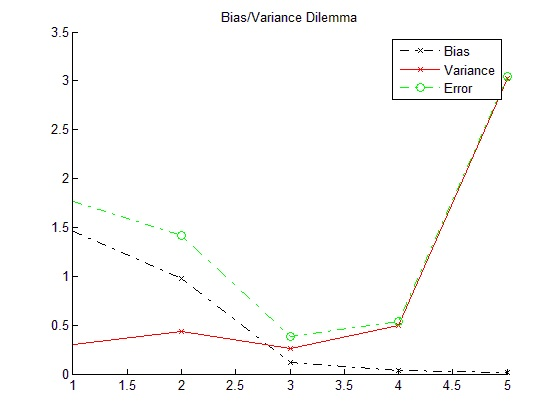

## John's Approach for the Housing data

* From above explaination John understood 60% of the concept, he was looking for other methods to tackle overfitting and underfitting on his **entire data set**

* Jay mentioned that what if he took a small part of his data to test the model (or use it to validate the effectiveness of the model) and train the model on the rest of the data? 

 - This would surely give a good idea on how it's performing since we already know the output of those rows used to test the model 
 
* Jay has insinuated to use Cross Validation which helps to tackle  overfitting and underfitting as well as Bias - Variance -Trade off.

* John was more keen to learn, how cross validation works.

## Model Validation:
***
<br /> 
 
 
- Cross-Validation is another technique that helps tackle the issue of overfitting
- Validation is a technique which involves reserving a particular sample of a data set on which you do not train the model.
- Later, you test the model on this sample before finalizing the model (model validation)

## Cross-validation
***
Keeping a validation set aside helps check overfitting on the training set, as the overfitted model will give high performance on the training set but will perform poorly on the validation set.
This helps in measuring the model's ability to generalise


- **NOTE** : WE ARE GOING TO PERFORM CROSS-VALIDATION AND L1/L2 REGULARIZATION ON THE ENTIRE DATA SET (NY HOUSING DATA SET COLLECTED BY JOHN)

**Methods for model validation:**
- Holdout sets
- Cross-validation
    - k-fold validation
- Hold-one-out (also known as Leave-one-out validation)


**Holdout sets**
- We separate keep a portion of train data separate for validation.
- The data used to train the model is known as “Training set”
- The data used to validate the model is known as “Validation set”
  sklearn's cross_validation provides train_test_split api

## Validation through Holdout Set
***
<br/>
Let's see how to do this in Python. This is going to be interesting so please pay close attention! Use Lasso/Ridge as exercise where the other is not implemented 

 - Time Complexity of the Algorithm would be different for each method so it's normal if one method takes more time than the other! 

In [ ]:
import pandas as pd
data = pd.read_csv("../data/house_prices_multivariate.csv")
data.head()

In [ ]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data['SalePrice']

# split the data with 50% in each set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9, train_size=0.5)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Instantiate a Linear Regression model
linear_model = LinearRegression()

#Fit and predict

# Code starts here





In [ ]:
lasso_model=Lasso(alpha=140, max_iter=100000, random_state=9)

# Code starts here

# fit the model on one set of data

# evaluate the model on the second set of data




In [ ]:
ridge_model=Ridge(alpha=0.00001, max_iter=100000, random_state=9)

# Code starts here

# fit the model on one set of data


# evaluate the model on the second set of data




### Visualize the trend of coefficients

In [ ]:
linear_coef = linear_model.coef_
plt.figure(figsize=(15, 8))
plt.plot(range(len(linear_coef)), linear_coef)
plt.plot(range(len(linear_coef)), [0]*len(linear_coef))
ticks = tuple(("x"+str(i) for i in range(35)))
plt.xticks(range(35),ticks)
plt.xlabel("Coefficients of $x_i$")
plt.ylabel("Y")
plt.title('Linear Regression')
plt.show()

In [ ]:
lasso_coef = lasso_model.coef_
plt.figure(figsize=(15, 8))
plt.plot(range(len(lasso_coef)), lasso_coef)
plt.plot(range(len(linear_coef)), [0]*len(linear_coef))
ticks = tuple(("x"+str(i) for i in range(35)))
plt.xticks(range(35),ticks)
plt.xlabel("Coefficients of $x_i$")
plt.ylabel("Y")
plt.title('Lasso Regression')
plt.show()

In [ ]:
ridge_coef = ridge_model.coef_
plt.figure(figsize=(15, 8))
plt.plot(range(len(ridge_coef)), ridge_coef)
plt.plot(range(len(linear_coef)), [0]*len(linear_coef))
ticks = tuple(("x"+str(i) for i in range(35)))
plt.xticks(range(35),ticks)
plt.xlabel("Coefficients of $x_i$")
plt.ylabel("Y")
plt.title('Linear Regression')
plt.show()

In [ ]:
# code to compare coefficients of each method and their graphs for better understanding! Very Important

plt.figure(figsize=(15, 8))

# Code starts here






# Code ends here

ticks = tuple(("x"+str(i) for i in range(35)))
plt.xticks(range(35),ticks)
plt.xlabel("Coefficients of $x_i$")
plt.ylabel("Y")
plt.show()

## Model validation via Cross-Validation
***
<br />
- Disadvantage of using a holdout set for model validation is that we have lost a portion of our data to the model training.
- This is not optimal, and can cause problems – especially if the initial set of training data is small.
- One way to address this is to use cross-validation; do a sequence of fits where each subset of the data is used both as a       training set and as a validation set.

Here we do two validation trials, alternately using each half of the data as a holdout set
Accuracy scores could be combined (by, say, taking the mean) to get a better measure of the global model performance.
This particular form of cross-validation is a two-fold cross-validation
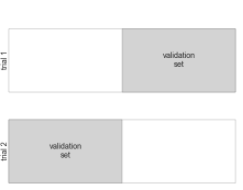

## Model validation through k-fold validation
***
<br />

- We could expand on this idea to use even more trials, and more folds in the data.
- Here we split the data into five groups, and use each of them in turn to evaluate the model fit on the other 4/5 of the data.
- We can use Scikit-Learn's cross_val_score convenience routine to do it succinctly

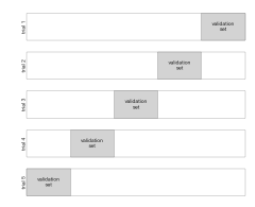

In [ ]:
# #code for implementing k-fold validation
# ## Model validation through k-fold validationfrom sklearn.cross_validation import cross_val_score

# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)
# scores.mean()

## Hold-one-out (also known as Leave-one-out validation)
***
<br />

- In this approach, we reserve only one data-point of the available data set for testing.
- And, train model on the rest of data set. This process iterates for each data point.
- We make use of all data points, hence low bias.
- This approach leads to higher variation in testing model effectiveness because we test against one data point.
- So, our estimation gets highly influenced by the data point.
- If the data point turns out to be an outlier, it can lead to higher variation.

If we have 150 samples, the leave one out cross-validation yields scores for 150 trials,

In [ ]:
# #code to implement Hold-one-out validation
# from sklearn.cross_validation import LeaveOneOut
# scores = cross_val_score(model, X,y, scoring="neg_mean_squared_error", cv=LeaveOneOut(X.shape[0]))
# print ("mean score:", scores.mean())
# print ("shape:", scores.shape[0])

# In-class Activity

## Big Mart Sales

## Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


## About the DataSet :
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

|Features|Description|
|-----|-----|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particular store. This is the outcome variable to be predicted.|
|source|is it a train data or test data point|

 
 Just to inform you guys that this data is preprocessed with necessary missing value imputation and feature engineering and encoding of features.

In [ ]:
# Load the data

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

sales_data = pd.read_csv('../data/sales.csv',index_col=False)

sales_data.head()

In [ ]:
#'Item_Type','Outlet_Establishment_Year' have  been converted to different types. Drop these columns:
sales_data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Drop unnecessary columns:
sales_data.drop(['source'],axis=1,inplace=True)

### Create a baseline regression model and observe the error measured.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Let's try out to set up a baseline model with just two explanatory variables
X1 = sales_data.loc[:, ['Item_Weight', 'Item_MRP', 'Item_Visibility']]

x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, sales_data.Item_Outlet_Sales.values, test_size=0.3, random_state =43)

# Code starts here

# Intiating baseline model



# Predicting on the sample subset 


# Calculating error



# R-Square




### What will happen to R-Square score if you increase the no. of predictors in your model.Use all features for prediction and implement a linear regression model

In [ ]:
# Let's try out to set up a baseline model with just two explanatory variables
X2 = sales_data.drop(columns=['Item_Outlet_Sales','Item_Identifier'],axis = 1)

x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, sales_data.Item_Outlet_Sales, test_size =0.3, random_state =100)

# Code starts here

# Intiating baseline model



# Predicting on the sample subset 


# Calculating error



# R-Square



We saw that addition of `Item_Visibility` variable has caused the mse to further reduced value. There is an increase in the R-square value, does it mean that the addition of `Item_Visibility` is useful for out model.

The only drawback of R2 is that if new predictors (X) are added to our model, R2 only increases or remains constant but it never decreases. We can not judge that by increasing complexity of our model, are we making it more accurate?

That is why, we use “Adjusted R-Square”.



### What will happen if we remove some features from the previous model. Also, how would associate the change in model accuracy with addition or negation of a feature in the model ? 

In [ ]:

X3 = sales_data.drop(columns=['Item_Outlet_Sales','Item_Identifier', 'Item_Visibility', 'Outlet_Years'],axis=1)
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, sales_data.Item_Outlet_Sales, test_size =0.3, random_state =100)

# Code starts here

# Intiating baseline model



# Predicting on the sample subset 


# Calculating error



# R-Square



In [ ]:
# Comparing r square and across three models

# Code starts here




### Apply Regularization techniques on the dataset that performed best.

In [ ]:
# Ridge

# Code Starts here




# fit the model on one set of data


# evaluate the model on the second set of data



In [ ]:
# Ridge

# Code Starts here



# fit the model on one set of data


# evaluate the model on the second set of data




In [ ]:
# Elastic Net

# Code Starts here



# fit the model on one set of data


# evaluate the model on the second set of data



# Further Reading
***
* [Ridge and Lasso in Python](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/)
* [Overview of Bias-Variance Trade-Off](http://www.kdnuggets.com/2016/08/bias-variance-tradeoff-overview.html)

# Thank You
***
### Next Session
***
- Scaling, Centering, Skewness 
- Basic data cleaning and Preprocessing
- Feature extraction and Feature engineering